# Exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import the whole dataset for exploration
forest_fire = pd.read_csv(
    filepath_or_buffer="forestfires.csv"
)

In [4]:
# Examine the values in the dataset
forest_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [5]:
# Summary statistics for each attribute
forest_fire.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
# Separate attributes into their categories, whole number, and numerical data types
times:pd.DataFrame = forest_fire[["month", "day"]]
coord:pd.DataFrame = forest_fire[["X", "Y"]]
numer:pd.DataFrame = forest_fire.drop(
    labels=[*times.columns,*coord.columns], axis=1
)

## Time Attributes

In [7]:
month_freq = lambda month: times[times["month"] == month]["month"].count()
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
month_count = {}

for month in months:
    month_count[month] = month_freq(month)

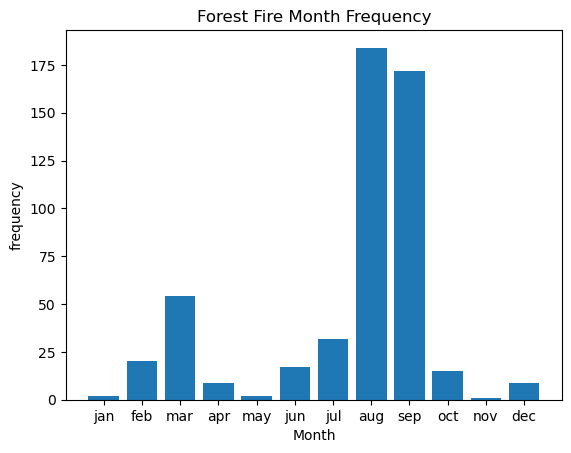

In [7]:
plt.bar(x=month_count.keys(), height=month_count.values())
plt.title(label="Forest Fire Month Frequency")
plt.xlabel(xlabel="Month")
plt.ylabel(ylabel="frequency")
plt.show()

In [8]:
day_freq = lambda day: times[times["day"] == day]["day"].count()
days:list = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
day_count:dict = {}

for day in days:
    day_count[day] = day_freq(day)

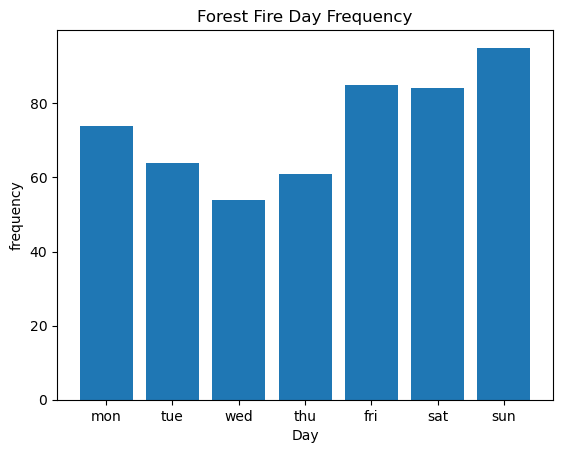

In [9]:
plt.bar(x=day_count.keys(), height=day_count.values())
plt.title(label="Forest Fire Day Frequency")
plt.xlabel(xlabel="Day")
plt.ylabel(ylabel="frequency")
plt.show()

## Location Attributes

In [10]:
axis_freq = lambda pos, axis: coord[coord[axis] == pos][axis].count()

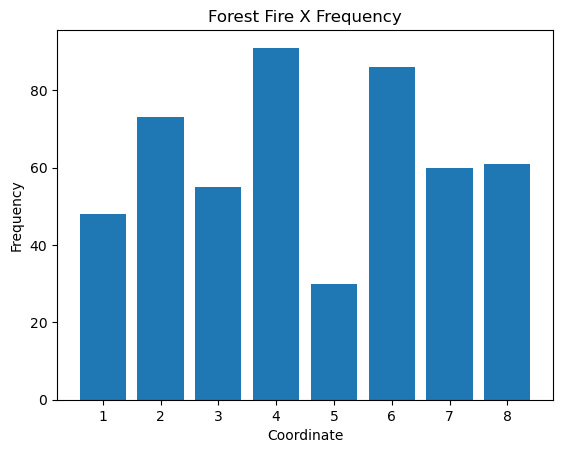

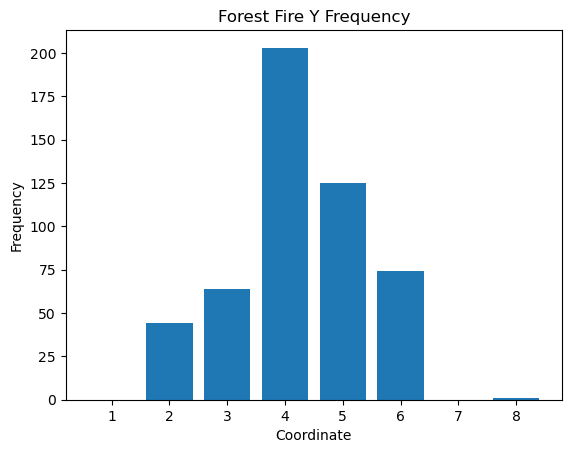

In [11]:
for axis in coord:
    pos_count:dict = {}
    pos_range:list = range(1,max(coord[axis]))
    for pos in pos_range:
        pos_count[pos] = axis_freq(pos=pos, axis=axis)
    
    plt.bar(x=pos_count.keys(), height=pos_count.values())
    plt.title(label=f"Forest Fire {axis} Frequency")
    plt.xlabel(xlabel="Coordinate")
    plt.ylabel(ylabel="Frequency")
    plt.show()

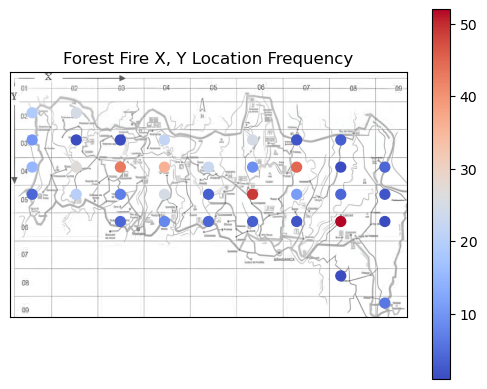

In [12]:
# Read data
pos_heat = coord.value_counts().reset_index(name="count")
img = plt.imread(
    fname="../The-map-of-the-Montesinho-natural-park-edit.png"
)

# Position x and y within image area
x = (pos_heat["X"]-0.5)*(len(img[0])/9)
y = abs(pos_heat["Y"]-0.5)*(len(img)/9)

# Overlapped scatter plot
fig, ax = plt.subplots()
plot = ax.scatter(
    x=x,
    y=y,
    s=50,
    c=pos_heat["count"],
    cmap="coolwarm"
)
ax.imshow(img)
fig.colorbar(mappable=plot)
ax.set_title("Forest Fire X, Y Location Frequency")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

## Numerical Attributes

In [13]:
attributes:dict = {}
for attr in numer:
    month_dist:dict = {}
    for month in months:
        month_dist[month] = forest_fire[forest_fire["month"] == month][attr]

    attributes[attr] = month_dist

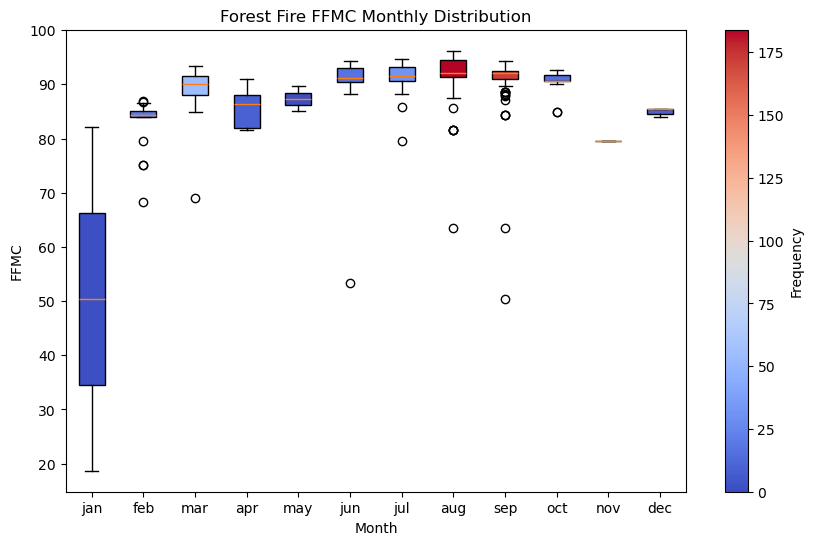

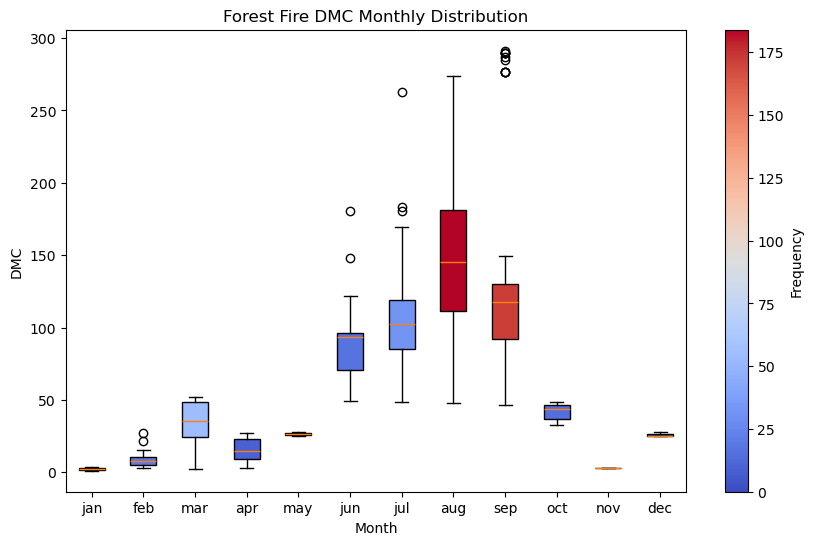

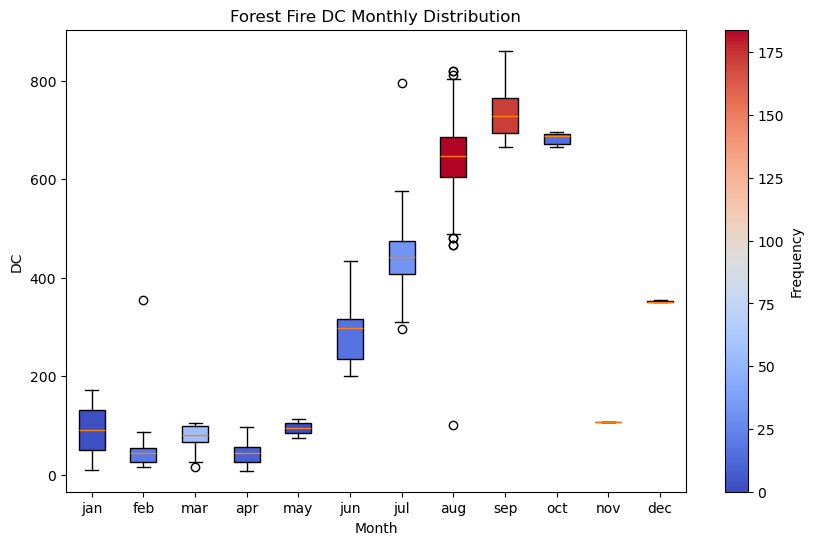

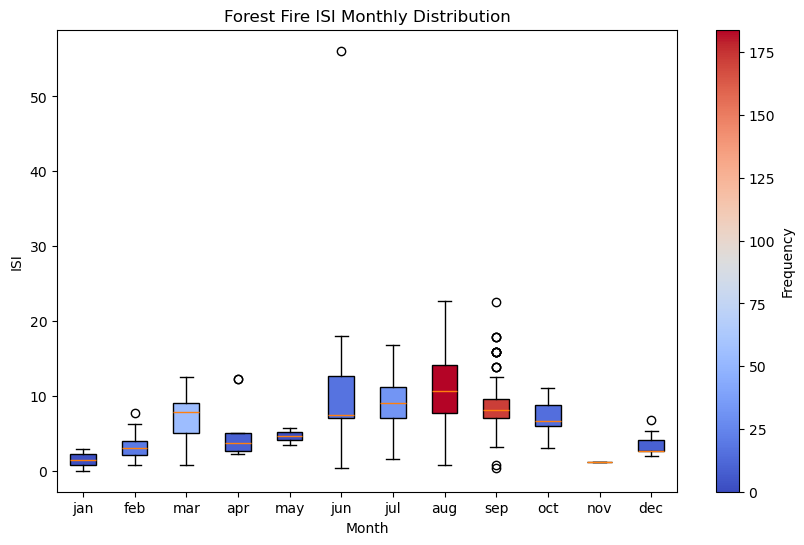

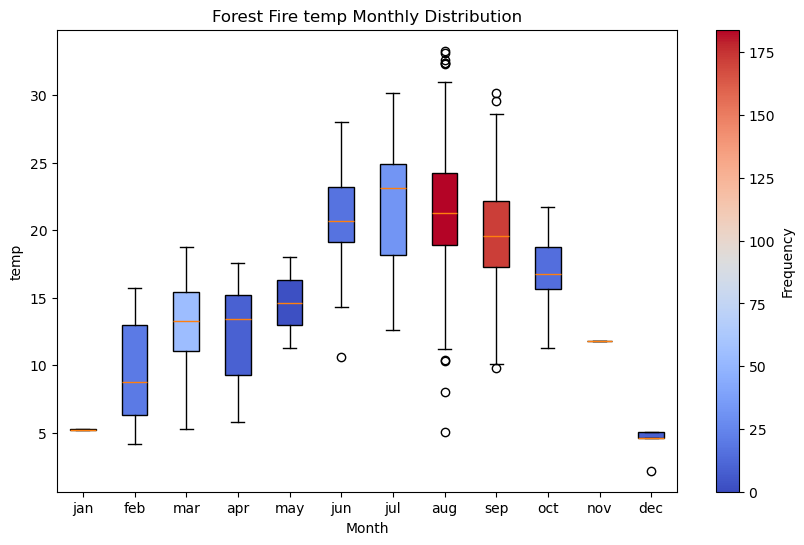

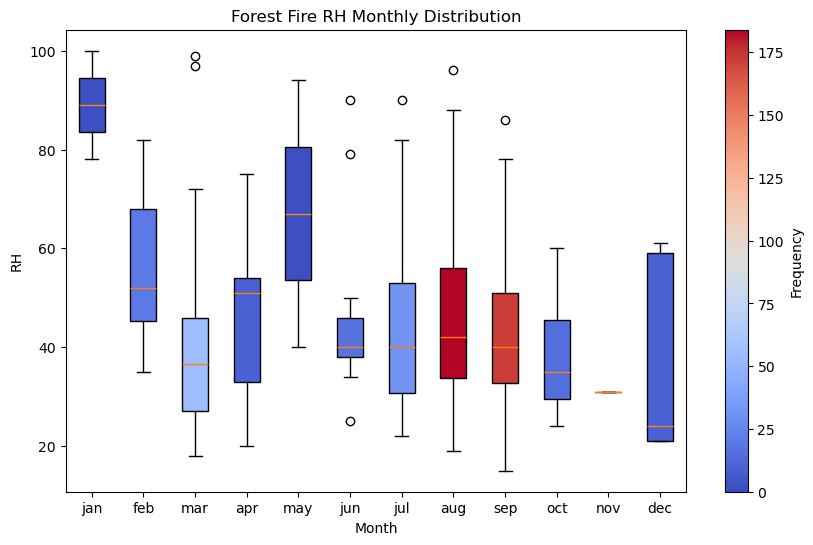

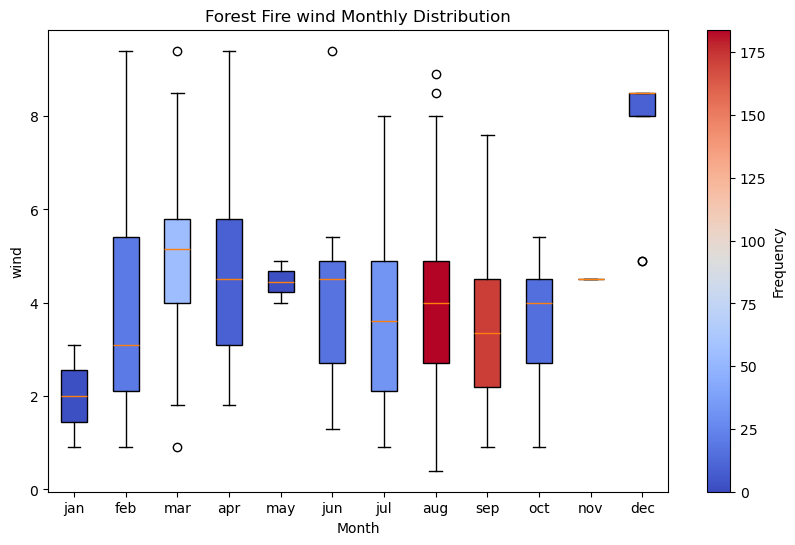

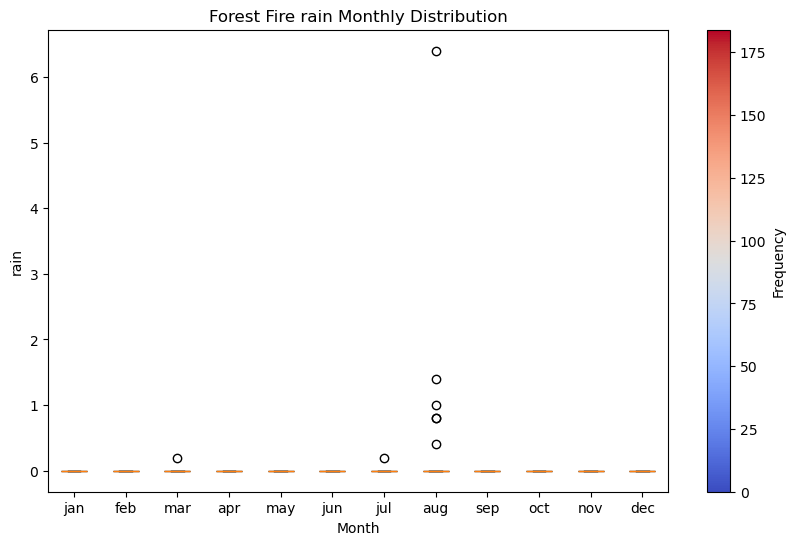

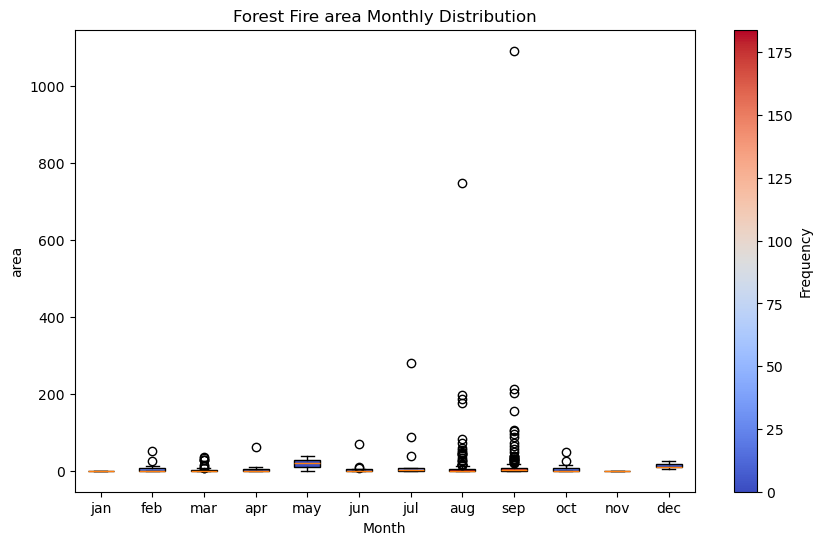

In [14]:
import matplotlib
colormap = matplotlib.colormaps["coolwarm"]

for attr in attributes:
    plt.figure(figsize=(10, 6))
    plt.title(f"Forest Fire {attr} Monthly Distribution")
    plt.xlabel(xlabel="Month")
    plt.ylabel(ylabel=attr)

    # Extract values for each month
    data = list(attributes[attr].values())
    months = list(attributes[attr].keys())

    # Calculate frequencies and normalize on a 0 to 1 scale
    frequencies = [len(val) for val in data]
    norm_freq = np.array(frequencies)/max(frequencies)

    # Create boxplot with patch_artist to allow colour mapping
    box = plt.boxplot(
        x=attributes[attr].values(), labels=months, patch_artist=True
    )

    # Apply colour based on frequency
    for patch, freq in zip(box["boxes"], norm_freq):
        patch.set_facecolor(colormap(freq))

    # Add colour bar for reference
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=0, vmax=max(frequencies)))
    sm.set_array([])
    plt.colorbar(sm, label="Frequency", ax=plt.gca())

    plt.show()